-->**Step 4**. Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preprocessing data
from sklearn.preprocessing import LabelEncoder

#Data partition
from sklearn.model_selection import train_test_split

#For 1st Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#For 2nd Model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data Science (Arnoldo Ramirez) - Learning Gate/Retos/06.03 Aprendizaje Supervisado | Reto/bank_marketing_RETO_DS_AS.csv')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


-->**Step 5**. Obtén la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable y la cantidad de datos perdidos de cada variable en caso de que existan.

**Nota**: Existen 9,000 registros por atributo. En cada columna no hay datos faltantes que requieran un ajuste. Y de las 17 columnas, 11 son de Tipo Objeto, las cuales deberan ser procesadas.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [4]:
#Conociendo algunas variables Object mas importantes
print(data['job'].value_counts(), '\n\n')
print(data['marital'].value_counts(), '\n\n')
print(data['education'].value_counts(), '\n\n')
print(data['default'].value_counts(), '\n\n')
print(data['housing'].value_counts(), '\n\n')
print(data['loan'].value_counts(), '\n\n')
print(data['contact'].value_counts(), '\n\n')

management       1999
blue-collar      1688
technician       1485
admin.           1004
services          771
retired           594
self-employed     319
student           312
unemployed        290
housemaid         246
entrepreneur      241
unknown            51
Name: job, dtype: int64 


married     5124
single      2837
divorced    1039
Name: marital, dtype: int64 


secondary    4486
tertiary     2893
primary      1244
unknown       377
Name: education, dtype: int64 


no     8865
yes     135
Name: default, dtype: int64 


no     4564
yes    4436
Name: housing, dtype: int64 


no     7820
yes    1180
Name: loan, dtype: int64 


cellular     6438
unknown      1982
telephone     580
Name: contact, dtype: int64 




-->**Step 6**. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

**Nota**: Se decide usar **LabelEncoder** derivado de que existen algunas columnas las cuales contienen 3 o mas categorias en cada uno, lo cual generaria demasiadas variables en caso de haber utilizado el metodo OneHotEncoder.

In [7]:
data2 = data.copy()

for col in data2.columns:
    if data2[col].dtype == 'object':
        data2[col] = LabelEncoder().fit_transform(data2[col])

data2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,2,0,2666,0,0,0,10,9,318,2,97,6,2,1
1,29,10,2,3,0,1584,0,0,0,6,11,245,1,-1,0,3,1
2,41,1,1,1,0,2152,1,0,0,17,9,369,1,-1,0,3,0
3,50,1,1,1,0,84,1,0,0,17,5,18,8,-1,0,3,0
4,40,0,1,1,0,0,0,0,0,28,5,496,2,182,11,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,1,1,1,0,314,1,1,2,16,8,269,2,-1,0,3,0
8996,32,1,1,1,0,491,1,0,2,8,8,223,2,-1,0,3,0
8997,44,7,2,1,0,2886,0,0,2,20,6,31,1,-1,0,3,0
8998,57,7,1,0,0,491,1,0,0,15,0,1217,3,-1,0,3,1


-->**Step 7**. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.


In [8]:
def fun1(X):
  return np.log(X + 1)

In [9]:
numeric = ['age', 'balance', 'duration']

for col in data2.columns:
    if col in numeric:
        data2[col] = fun1(np.sqrt(data2[col]))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
data2['pdays'] = np.sqrt(data2['pdays'])

In [11]:
#Se modifican los valores NaN derivados del preprocesamiento anterior
data2['balance'] = data2['balance'].fillna(value=round(data2['balance'].mean()))
data2['pdays'] = data2['pdays'].fillna(value=round(data2['pdays'].mean()))

In [12]:
#Confirman que no existan Non-Null values
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9000 non-null   float64
 1   job        9000 non-null   int64  
 2   marital    9000 non-null   int64  
 3   education  9000 non-null   int64  
 4   default    9000 non-null   int64  
 5   balance    9000 non-null   float64
 6   housing    9000 non-null   int64  
 7   loan       9000 non-null   int64  
 8   contact    9000 non-null   int64  
 9   day        9000 non-null   int64  
 10  month      9000 non-null   int64  
 11  duration   9000 non-null   float64
 12  campaign   9000 non-null   int64  
 13  pdays      9000 non-null   float64
 14  previous   9000 non-null   int64  
 15  poutcome   9000 non-null   int64  
 16  y          9000 non-null   int64  
dtypes: float64(4), int64(13)
memory usage: 1.2 MB


In [13]:
#Normalizando las variables numericas iniciales
def fun2(X):
  return (X - np.mean(X)) / np.std(X)

numeric_all = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']

for col in data2.columns:
  if col in numeric_all:
    data2[col] = fun2(data2[col])

In [14]:
data2.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9.000000e+03,9.000000e+03,9.000000e+03,9.000000e+03,9000.000000,9000.000000
mean,-2.043205e-15,4.500778,1.199778,1.267000,0.015000,-1.571089e-16,0.492889,0.131111,0.504889,1.381611e-17,5.462667,-7.018583e-16,5.901452e-17,-2.325054e-16,1.381611e-17,2.481111,0.420778
std,1.000056e+00,3.233238,0.625139,0.745651,0.121559,1.000056e+00,0.499977,0.337541,0.830962,1.000056e+00,3.147263,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.009169,0.493711
min,-2.778573e+00,0.000000,0.000000,0.000000,0.000000,-2.783345e+00,0.000000,0.000000,0.000000,-1.751927e+00,0.000000,-4.033543e+00,-5.552703e-01,-6.253254e+00,-3.569390e-01,0.000000,0.000000
25%,-7.711310e-01,1.000000,1.000000,1.000000,0.000000,-2.730381e-01,0.000000,0.000000,0.000000,-9.130858e-01,3.000000,-6.276924e-01,-5.552703e-01,2.331797e-02,-3.569390e-01,3.000000,0.000000
50%,-5.947645e-02,4.000000,1.000000,1.000000,0.000000,1.249645e-01,0.000000,0.000000,0.000000,-7.424414e-02,6.000000,6.814609e-03,-1.899876e-01,2.331797e-02,-3.569390e-01,3.000000,0.000000
75%,7.737735e-01,7.000000,2.000000,2.000000,0.000000,6.376620e-01,1.000000,0.000000,1.000000,6.447630e-01,8.000000,7.017924e-01,1.752951e-01,2.331797e-02,-3.569390e-01,3.000000,1.000000
max,3.254823e+00,11.000000,2.000000,3.000000,1.000000,2.407397e+00,1.000000,1.000000,2.000000,1.843108e+00,11.000000,2.830669e+00,2.026584e+01,7.340236e+00,2.588562e+01,3.000000,1.000000


-->**Step 8**. Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.


In [15]:
#Asignando a variables
X = data2.iloc[:, 0:16]
y = data2['y']

-->**Step 9.** Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.


In [16]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y,train_size=.60)

x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test,y_validation_and_test, test_size=.50)

print("Dimensión X_train_set:\t\t", x_train.shape)
print("Dimensión X_validation_set:\t", x_validation.shape)
print("Dimension X_test_set:\t\t", x_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validation:\t\t", y_validation.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 16)
Dimensión X_validation_set:	 (1800, 16)
Dimension X_test_set:		 (1800, 16)

Dimensión Y_train:		 (5400,)
Dimensión Y_validation:		 (1800,)
Dimensión Y_test:		 (1800,)


--> **Step 10**. Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.


In [17]:
#Primer modelo de Regresion Logistica
modelo_RL = LogisticRegression()

modelo_RL.fit( x_train, np.ravel(y_train))

print('Exactitud del modelo es: ', modelo_RL.score(x_test, y_test))

Exactitud del modelo es:  0.7933333333333333


In [20]:
#Encontrando mejores parametros
parameters = {
    'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3]
    , 'penalty': ('l2', 'elasticnet', 'None')
    , 'solver': ('netwon-cg', 'saga', 'lbfgs', 'sag')
}

In [21]:
RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(x_train, np.ravel(y_train))

print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un secore de %0.2f" % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(x_test, y_test))

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'None'),
                         'solver': ('netwon-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.2, 'penalty': 'l2', 'solver': 'saga'} con un secore de 0.79
0.7933333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skle

Los mejores valores encontrados son {'C': 0.2, 'penalty': 'l2', 'solver': 'saga'} con un secore de 0.7933



In [22]:
modelo_RL = LogisticRegression( C=0.2,
                                penalty = 'l2',
                                solver='saga',
                                max_iter=10000)

modelo_RL.fit( x_train, np.ravel(y_train))

print('Exactitud del modelo es: ', modelo_RL.score(x_test, y_test))

Exactitud del modelo es:  0.7933333333333333


**Analisis de la Matriz de Confusion:** Derivado de la siguiente matriz generada con el modelo de Regresion Logistico, podemos confirmar que el modelo clasifica correctamente 79.33% de los valores que se le otorgan, y de los cuales genera aproximadamente el 10% para Falsos Positivos y el 10% para Falsos Negativos.

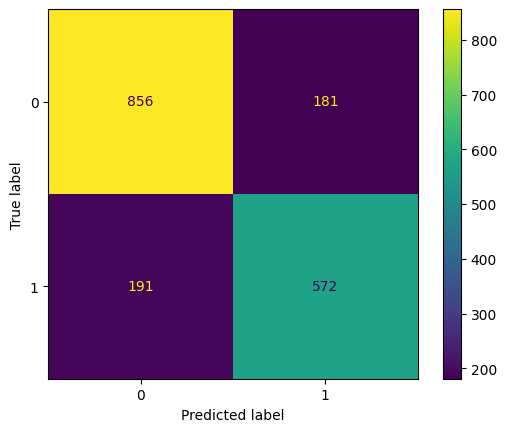

In [23]:
#Generando la matriz de confusion

y_pred2 = modelo_RL.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

-->**Step 11.** Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.


In [25]:
neuronas = [i for i in range(1, 50, 5)]

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i),
                        max_iter=1000,
                        alpha=0.7)

  model.fit(x_train, y_train)

  # TRAIN set
  train_yhat = model.predict(x_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


  # TEST set
  test_yhat = model.predict(x_test)

  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)


  # progreso de las épocas del entrenamiento ...
  print('>%d, train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' % (i, train_acc, test_acc, train_loss, test_loss))

>1, train: 0.798, test: 0.794, losstrain: 0.202, losstest: 0.206
>6, train: 0.825, test: 0.801, losstrain: 0.175, losstest: 0.199
>11, train: 0.840, test: 0.813, losstrain: 0.160, losstest: 0.187
>16, train: 0.836, test: 0.804, losstrain: 0.164, losstest: 0.196
>21, train: 0.842, test: 0.815, losstrain: 0.158, losstest: 0.185
>26, train: 0.842, test: 0.811, losstrain: 0.158, losstest: 0.189
>31, train: 0.848, test: 0.814, losstrain: 0.152, losstest: 0.186
>36, train: 0.841, test: 0.811, losstrain: 0.159, losstest: 0.189
>41, train: 0.852, test: 0.812, losstrain: 0.148, losstest: 0.188
>46, train: 0.848, test: 0.816, losstrain: 0.152, losstest: 0.184


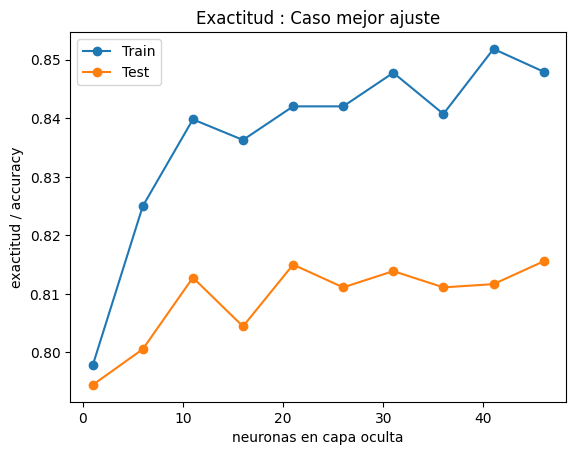

In [26]:
plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('exactitud / accuracy')
plt.show()

In [28]:
#Probando modelo con las neuronas que muestran un mejor performance
model = MLPClassifier(hidden_layer_sizes=(22),
                        max_iter=1000,
                        alpha=0.7)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8127777777777778

**Analisis de la Matriz de Confusion:** Derivado de la siguiente matriz generada con el modelo de Redes Neuronales (MLPClassifier), podemos confirmar que el modelo clasifica correctamente 81.3% de los valores que se le otorgan, y de los cuales genera aproximadamente el 9% para Falsos Positivos y el 9% para Falsos Negativos.

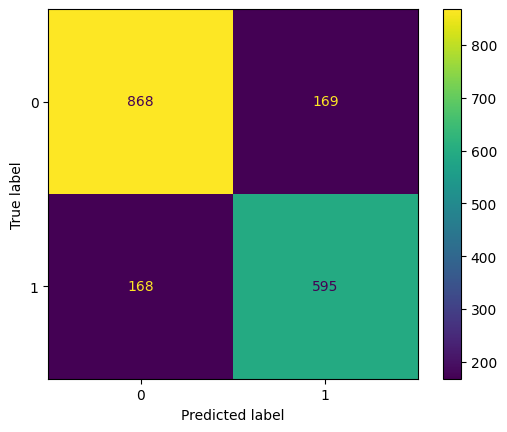

In [29]:
y_pred3 = model.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
plt.show()

# Conclusion

Para este ejercicio en especifico lo ideal seria ir con un modelo de Redes Neuronales (MLPClassifier) derivado de i) tener un mejor **score** overall en el modelo, ii) presentar un mejor balance entre Falsos Negativos y Falsos Positivos.  